In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

In [2]:
# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ez4e-fazm", limit=2000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)
df

,school_year,busbreakdown_id,run_type,bus_no,route_number,reason,schools_serviced,occurred_on,created_on,boro,...,number_of_students_on_the_bus,has_contractor_notified_schools,has_contractor_notified_parents,have_you_alerted_opt,informed_on,last_updated_on,breakdown_or_running_late,school_age_or_prek,how_long_delayed,incident_number
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,New Jersey,...,11,Yes,No,Yes,2015-11-05T08:12:00.000,2015-11-05T08:12:14.000,Running Late,School-Age,NaN,NaN
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,2015-11-05T08:10:00.000,2015-11-05T08:12:00.000,Manhattan,...,2,Yes,Yes,No,2015-11-05T08:12:00.000,2015-11-05T08:13:34.000,Running Late,School-Age,20MNS,NaN
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,2015-11-05T08:09:00.000,2015-11-05T08:13:00.000,Bronx,...,8,Yes,Yes,Yes,2015-11-05T08:13:00.000,2015-11-05T08:13:22.000,Running Late,Pre-K,15MIN,NaN
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,2015-11-05T08:12:00.000,2015-11-05T08:14:00.000,Manhattan,...,6,No,No,No,2015-11-05T08:14:00.000,2015-11-05T08:14:04.000,Running Late,School-Age,15 MIN,NaN
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,2015-11-05T08:13:00.000,2015-11-05T08:14:00.000,Manhattan,...,6,No,No,No,2015-11-05T08:14:00.000,2015-11-05T08:14:08.000,Running Late,School-Age,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015-2016,1231034,Special Ed AM Run,GC0048,X647,Heavy Traffic,08131,2015-11-20T07:37:00.000,2015-11-20T07:39:00.000,Bronx,...,3,Yes,No,No,2015-11-20T07:39:00.000,2015-11-20T07:39:01.000,Running Late,School-Age,10 mins,NaN
1996,2015-2016,1231036,Special Ed AM Run,2432,M288,Mechanical Problem,02183,2015-11-20T07:36:00.000,2015-11-20T07:39:00.000,Manhattan,...,2,No,Yes,Yes,2015-11-20T07:39:00.000,2015-11-20T07:39:21.000,Breakdown,School-Age,NaN,NaN
1997,2015-2016,1231037,Special Ed AM Run,4137,Q175,Problem Run,24422,2015-11-20T07:38:00.000,2015-11-20T07:40:00.000,Queens,...,22,Yes,Yes,No,2015-11-20T07:40:00.000,2015-11-20T07:59:55.000,Running Late,School-Age,30 MINS,NaN
1998,2015-2016,1231043,Special Ed AM Run,9925,L359,Heavy Traffic,17862,2015-11-20T07:40:00.000,2015-11-20T07:42:00.000,Bronx,...,7,Yes,Yes,Yes,2015-11-20T07:42:00.000,2015-11-20T07:42:32.000,Running Late,School-Age,NaN,NaN


C:\Users\Dhars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


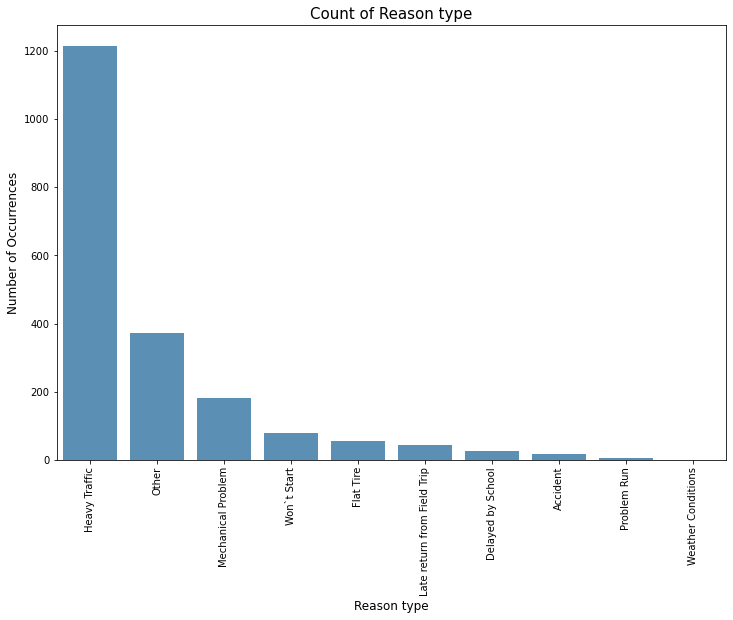

In [3]:
# to plot the count of reason type
color = sns.color_palette()
reason = df['reason'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(reason.index, reason.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Reason type', fontsize=12)
plt.title('Count of Reason type', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Dhars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


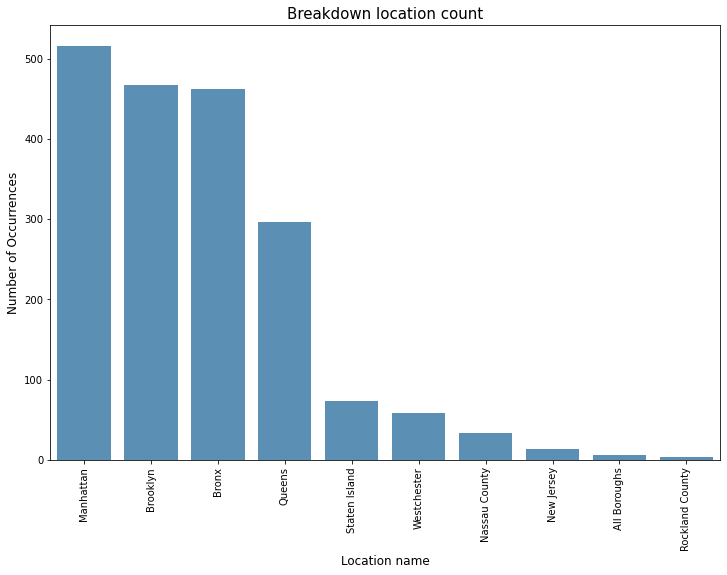

In [4]:
# to plot the count of location where delay occured
color = sns.color_palette()
reason = df['boro'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(reason.index, reason.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location name', fontsize=12)
plt.title('Breakdown location count', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Text(0.5, 1.0, ' Bus Company name')

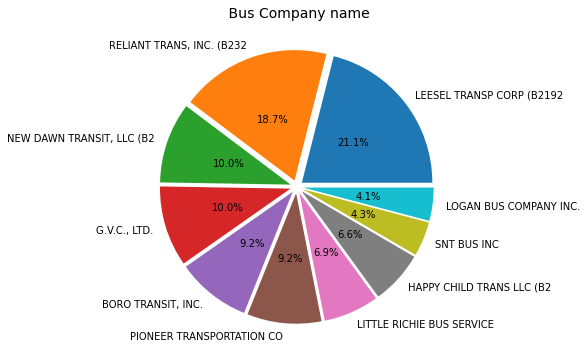

In [6]:
# Bus companies involved in the delay
c=df["bus_company_name"].value_counts()
c=c.head(10)
pie, ax = plt.subplots(figsize=[10,6])
labels = c.keys()
plt.pie(x=c, autopct="%.1f%%", explode=[0.05]*10, labels=labels, pctdistance=0.5)
plt.title(" Bus Company name", fontsize=14)

C:\Users\Dhars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


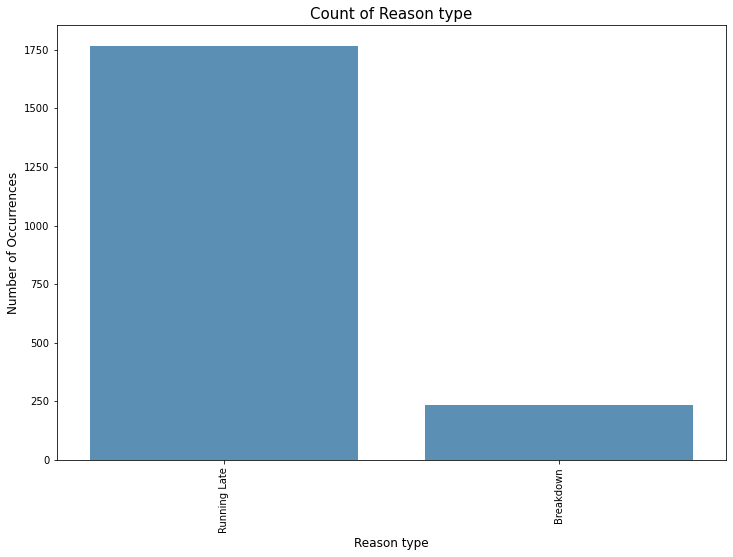

In [7]:
# count for running delay and breakdown
color = sns.color_palette()
reason = df['breakdown_or_running_late'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(reason.index, reason.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Reason type', fontsize=12)
plt.title('Count of Reason type', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:ylabel='has_contractor_notified_schools'>

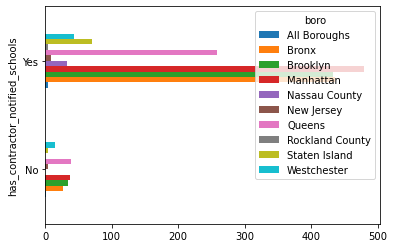

In [8]:
# Notification to the schools
df.groupby('boro').has_contractor_notified_schools.value_counts().unstack(0).plot.barh()